In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
dataset = pd.read_csv('data/dataset.csv')

In [3]:
dataset.head()

,X,y,classify
0,-0.909091,0.754890,0
1,5.959596,1.941976,1
2,-5.757576,0.252632,0
3,1.313131,1.248283,1
4,-5.353535,0.713097,0


In [4]:
dataset.shape

(100, 3)

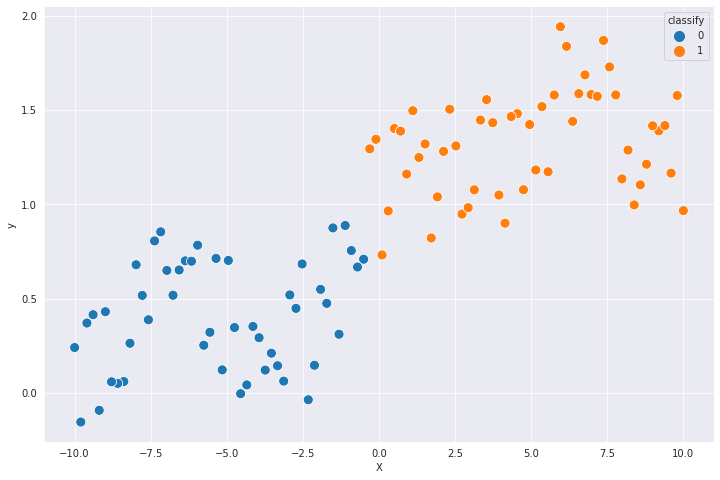

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
sns.despine(fig=fig, ax=ax, top=True, right=True)
sns.scatterplot(ax=ax, data=dataset, x='X', y='y', hue='classify',
                size='classify', sizes=(100, 100));

In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [7]:
def Normalization(features):
    features = features.astype('float64')
    cols = features.shape[1]
    for i in range(cols):
        minimum, maximum = np.amin(features[:, i]), np.amax(features[:, i])
        #scaling of that feature column
        features[:, i] = (features[:, i] - minimum) / (maximum - minimum)
    return features

In [8]:
X = Normalization(X)

In [9]:
def sigmoid(z):
    return(1.0/(1 + np.exp(-z)))-0.0001

In [10]:
def predict(features, weights):
    t = np.transpose(weights)
    z = (features.dot(t)).flatten()
    return sigmoid(z)

In [11]:
# cost function
# if y_true = 1 then return -log(y_pred)
# else -log(1 - y_pred)
# add each value and divide by observation(length of y_true)

def cross_entropy(y_true, features, weights):
    y_pred = predict(features=features, weights=weights)
    cost = np.sum((-1)*(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred)))/len(features)
    return cost

In [12]:
def minimize(features, y_true, weights, lr, epochs):
    m = len(features)
    for j in range(0, epochs):
        y_pred = predict(features, weights)
        for i in range(0, features.shape[1]):
            w_grad = np.sum((y_pred-y_true)*features[:, i])
            weights[i] -= w_grad * (lr/m)
        if(j%1000 == 0):
            loss = cross_entropy(y_true=y_true, features=features, weights=weights)
            print('epochs: {}, loss: {}'.format(j,loss))
    return weights

In [13]:
def LogisticRegression(features, y_true, epochs, lr=1e-1):
    rows = features.shape[0]
    bias = np.ones([rows, 1])
    features = np.hstack((features, bias))
    weights = [0.5]*(features.shape[1])
    weights = minimize(features=features, y_true=y_true, weights=weights, lr=lr, epochs=epochs) 
    y_pred = predict(features, weights)
    for i in range(len(y_pred)):
        y_pred[i]=1 if y_pred[i]>=0.5 else 0
    y_true = list(y_true)
    acc = np.sum([y_true[i] == y_pred[i] for i in range(len(y_true))])/len(y_true)
    
    return y_pred, acc

In [14]:
y_pred, acc = LogisticRegression(X, y, epochs=10000)

epochs: 0, loss: 0.6773541721279419
epochs: 1000, loss: 0.19898454877638908
epochs: 2000, loss: 0.13635847491610986
epochs: 3000, loss: 0.11032120130865235
epochs: 4000, loss: 0.09557958045808418
epochs: 5000, loss: 0.08590216766788555
epochs: 6000, loss: 0.07897019448155744
epochs: 7000, loss: 0.07371048764994466
epochs: 8000, loss: 0.06955319369227411
epochs: 9000, loss: 0.0661655074089105


In [15]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y.reshape(len(y),1)),1))

[[0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]]


In [16]:
acc

0.99